<a href="https://colab.research.google.com/github/chipsnwine/root-cause_decision-tree/blob/main/Root_Cause_Forecasting_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import requests
from io import StringIO
from pandas import DataFrame

url = "https://bit.ly/3suyUTh"
file = requests.get(url).content
csv = pd.read_csv(StringIO(file.decode('utf-8')))

csv.head()

,number,alarm_date,resolution_time,time_taken,site,site_name,alarm_description,rc1,rc2,rc3,short_description,fault_resolution,resolution_comments,root_cause,alarm_penalty,outage_penalty,company
0,TRB0310096,12/18/20 0:00,12/19/20 3:17,0.049954,TZDA0244,AGHAN KHAN,BTS BATTERY LOW,AC Circuit Breaker,Circuit Breaker Tripped due to Short Circuit,NaN,DC Voltage,Short removed and breaker reset,Mains load breaker inside generator tripped d,AC Breaker,0.0000,0.0,PIVOTECH
1,TRB0217616,2/11/20 0:00,2/12/20 3:18,0.050382,TZAR2419,Arusha_Stand,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Rectifier System Fail,Circuit Breaker Replaced,Tanesco power flactuation and low voltage cau,AC Breaker,104492.6213,0.0,NEWL
2,TRB0204707,12/31/19 0:00,12/31/19 15:45,0.074271,TZSM1636,BADI STADIUM,RECTIFIER SYSTEM FAIL,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Rectifier System Fail,Circuit Breaker Replaced,AC BREAKER TRIPPED DUE TO THUNDER. AC BREAKER,AC Breaker,0.0000,0.0,NETIS
3,TRB0229884,3/17/20 0:00,3/17/20 3:14,0.043900,TZPW2776,BAGAMOYO,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Circuit Breaker Tripped,NaN,Rectifier System Fail,Short Circuit Removed And Breaker Reset,fe Found Gave switch on L mode Gave switch re,AC Breaker,0.0000,0.0,PIVOTECH
4,TRB0255460,6/22/20 0:00,6/22/20 8:10,0.042164,TZPW2776,BAGAMOYO,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Faulty Breaker,NaN,Rectifier System Fail,Faulty Breaker Replaced,"I found Ac mains breaker fault, replacement d",AC Breaker,0.0000,0.0,PIVOTECH


In [7]:
csv.describe()

,time_taken,alarm_penalty,outage_penalty
count,21605.000000,21605.000000,2.160500e+04
mean,0.086056,12019.029754,2.394375e+04
std,0.785111,48737.551296,1.278186e+05
min,0.000000,0.000000,0.000000e+00
25%,0.013981,0.000000,0.000000e+00
50%,0.027095,0.000000,0.000000e+00
75%,0.044444,0.000000,0.000000e+00
max,40.415706,417970.485000,1.671882e+06


In [ ]:
pd.value_counts(csv['alarm_description']).plot.bar()

In [30]:
csv.columns

Index(['number', 'alarm_date', 'resolution_time', 'time_taken', 'site',
       'site_name', 'alarm_description', 'rc1', 'rc2', 'rc3',
       'short_description', 'fault_resolution', 'resolution_comments',
       'root_cause', 'alarm_penalty', 'outage_penalty', 'company'],
      dtype='object')

In [4]:
sites = DataFrame(csv, columns=['site', 'site_name', 'company'])
sites.describe()

,site,site_name,company
count,21605,21605,21605
unique,2761,2481,3
top,TZGT4886,BWONGELA,PIVOTECH
freq,357,357,10269


In [5]:
rca_dataset = DataFrame(csv, columns=['number', 'alarm_date', 'resolution_time', 'time_taken', 'site', 'site_name', 
                                      'alarm_description', 'rc1', 'rc2', 'rc3', 'short_description', 'fault_resolution', 
                                      'root_cause', 'alarm_penalty', 'outage_penalty', 'company'])

rca_dataset.head(10)

,number,alarm_date,resolution_time,time_taken,site,site_name,alarm_description,rc1,rc2,rc3,short_description,fault_resolution,root_cause,alarm_penalty,outage_penalty,company
0,TRB0310096,12/18/20 0:00,12/19/20 3:17,0.049954,TZDA0244,AGHAN KHAN,BTS BATTERY LOW,AC Circuit Breaker,Circuit Breaker Tripped due to Short Circuit,NaN,DC Voltage,Short removed and breaker reset,AC Breaker,0.0000,0.0,PIVOTECH
1,TRB0217616,2/11/20 0:00,2/12/20 3:18,0.050382,TZAR2419,Arusha_Stand,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Rectifier System Fail,Circuit Breaker Replaced,AC Breaker,104492.6213,0.0,NEWL
2,TRB0204707,12/31/19 0:00,12/31/19 15:45,0.074271,TZSM1636,BADI STADIUM,RECTIFIER SYSTEM FAIL,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Rectifier System Fail,Circuit Breaker Replaced,AC Breaker,0.0000,0.0,NETIS
3,TRB0229884,3/17/20 0:00,3/17/20 3:14,0.043900,TZPW2776,BAGAMOYO,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Circuit Breaker Tripped,NaN,Rectifier System Fail,Short Circuit Removed And Breaker Reset,AC Breaker,0.0000,0.0,PIVOTECH
4,TRB0255460,6/22/20 0:00,6/22/20 8:10,0.042164,TZPW2776,BAGAMOYO,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Faulty Breaker,NaN,Rectifier System Fail,Faulty Breaker Replaced,AC Breaker,0.0000,0.0,PIVOTECH
5,TRB0288850,10/17/20 0:00,10/17/20 19:09,0.037211,TZPW0072,BAGAMOYO,BTS O&M LINK FAILURE,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Site Down (OOS),Short Circuit Removed And Breaker Reset,AC Breaker,0.0000,600000.0,PIVOTECH
6,TRB0210315,1/18/20 0:00,1/18/20 19:05,0.019456,TZAR1781,Banana 900,RECTIFIER SYSTEM FAILED,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,Rectifier System Fail,Short Circuit Removed And Breaker Reset,AC Breaker,0.0000,0.0,NEWL
7,TRB0203823,12/28/19 0:00,12/28/19 12:26,0.015521,TZDA0297,BANANA RELINI,GENERATOR ABNORMAL,AC Circuit Breaker,Circuit Breaker Tripped,Faulty Circuit Breaker,Generator Failed to Start,Short Circuit Removed And Breaker Reset,AC Breaker,0.0000,0.0,PIVOTECH
8,TRB0248278,5/22/20 0:00,5/22/20 12:20,0.026053,TZDA0297,BANANA RELINI,BTS BATTERY LOW,AC Circuit Breaker,Circuit Breaker Tripped,Short Circuit,DC Voltage (Site Battery) Low,Short Circuit Removed And Breaker Reset,AC Breaker,0.0000,0.0,PIVOTECH
9,TRB0172121,10/7/19 0:00,10/7/19 15:36,0.042222,TZDA0201,BANDARI,RECTIFIRE SYSTEM FAILURE,AC Circuit Breaker,Circuit Breaker Tripped,Faulty Circuit Breaker,Rectifier System Fail,Circuit Breaker Replaced,AC Breaker,0.0000,0.0,PIVOTECH


# **Top 10 sites by trouble ticket count**

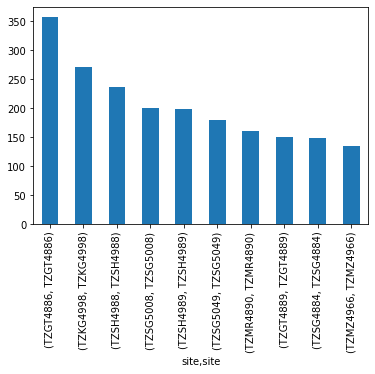

In [8]:
trb_frequency = rca_dataset.groupby(['site']).site.value_counts().nlargest(10)
trb_frequency.plot.bar()